## MA Backtesting

[*********************100%%**********************]  1 of 1 completed


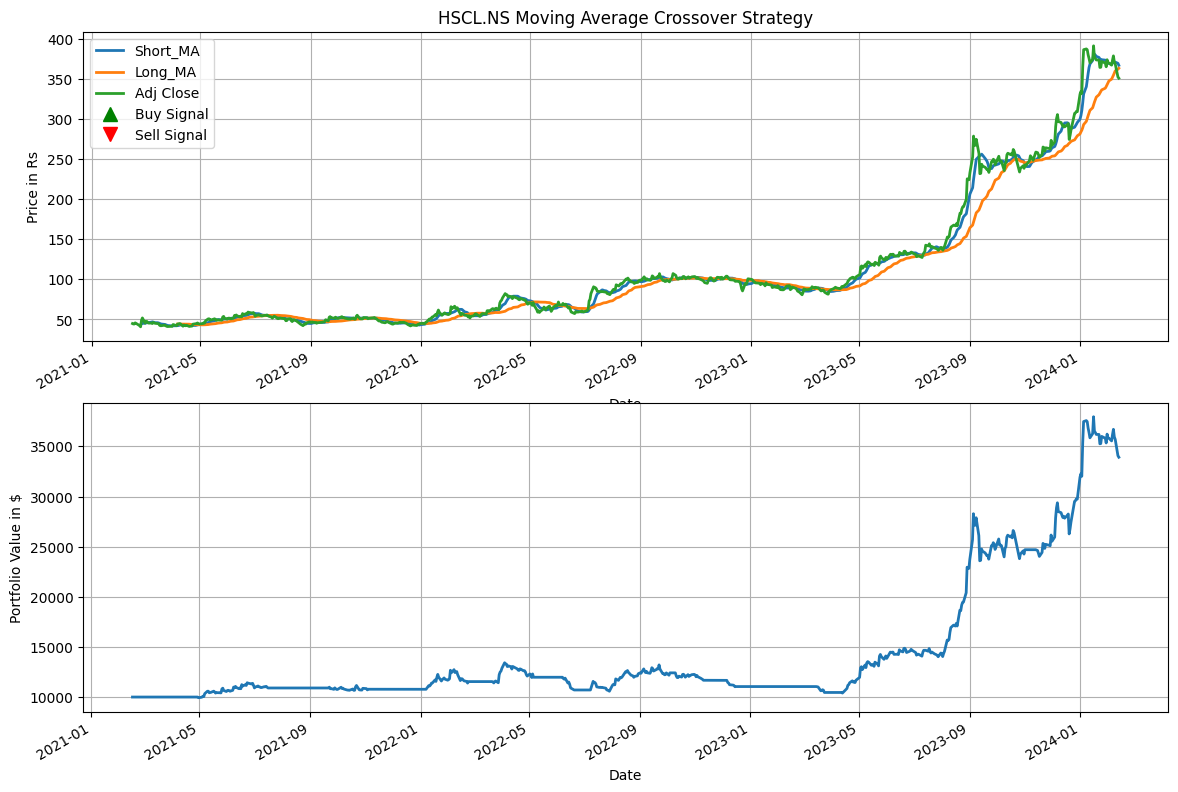

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# Configure the stock symbol, moving average windows, initial capital, and date range
symbol = 'HSCL.NS'
short_window = 9
long_window = 34
initial_capital = 10000  # Starting capital
num_of_years = 3
start_date = dt.date.today() - dt.timedelta(days=365 * num_of_years)
end_date = dt.date.today()

# Download stock data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate short and long moving averages
stock_data['Short_MA'] = stock_data['Adj Close'].rolling(window=short_window).mean()
stock_data['Long_MA'] = stock_data['Adj Close'].rolling(window=long_window).mean()

# Generate trading signals (1 = buy, 0 = hold/sell)
stock_data['Signal'] = np.where(stock_data['Short_MA'] > stock_data['Long_MA'], 1, 0)
stock_data['Positions'] = stock_data['Signal'].diff()

# Calculate daily and cumulative portfolio returns
stock_data['Daily P&L'] = stock_data['Adj Close'].diff() * stock_data['Signal']
stock_data['Total P&L'] = stock_data['Daily P&L'].cumsum()
stock_data['Positions'] *= 100  # Position size for each trade

# Construct a portfolio to keep track of holdings and cash
portfolio = pd.DataFrame(index=stock_data.index)
portfolio['Holdings'] = stock_data['Positions'] * stock_data['Adj Close']       
portfolio['Cash'] = initial_capital - portfolio['Holdings'].cumsum()
portfolio['Total'] = portfolio['Cash'] + stock_data['Positions'].cumsum() * stock_data['Adj Close']
portfolio['Returns'] = portfolio['Total'].pct_change()

# Plotting the strategy results and stock prices
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(2, 1, 1)
stock_data[['Short_MA', 'Long_MA', 'Adj Close']].plot(ax=ax1, lw=2.)
ax1.plot(stock_data.loc[stock_data['Positions'] == 1.0].index, stock_data['Short_MA'][stock_data['Positions'] == 1.0],'^', markersize=10, color='g', label='Buy Signal')
ax1.plot(stock_data.loc[stock_data['Positions'] == -1.0].index, stock_data['Short_MA'][stock_data['Positions'] == -1.0],'v', markersize=10, color='r', label='Sell Signal')
ax1.set_title(f'{symbol} Moving Average Crossover Strategy')
ax1.set_ylabel('Price in Rs')
ax1.grid()
ax1.legend()

# Plotting the portfolio value
ax2 = fig.add_subplot(2, 1, 2)
portfolio['Total'].plot(ax=ax2, lw=2.)
ax2.set_ylabel('Portfolio Value in $')
ax2.set_xlabel('Date')
ax2.grid()
plt.show()